In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


1.) Perform data preparation & cleaning (7 marks)

•	Load the dataset into a data frame using Pandas

•	Explore the number of rows & columns, ranges of values etc.

•	Handle missing, incorrect and invalid data

•	Perform any additional steps (parsing dates, creating additional columns, merging multiple datasets etc.) 


In [ ]:
from google.colab import files
uploaded = files.upload()

aqdf=pd.read_csv("Air Quality Data.csv")

Saving Air Quality Data.csv to Air Quality Data (1).csv


In [ ]:
print("the shape of the dataframe is:",aqdf.shape)
print("No of rows:",(aqdf.shape)[0])
print("No of cloumns:" ,(aqdf.shape)[1])

the shape of the dataframe is: (29531, 14)
No of rows: 29531
No of cloumns: 14


In [ ]:
aqdf['PM2.5'].fillna(aqdf['PM2.5'].mean(),inplace=True)

aqdf.PM10.fillna(aqdf['PM10'].mean(),inplace=True)

aqdf['NO'].fillna(aqdf['NO'].ffill(),inplace=True)

aqdf.NO2.fillna(aqdf['NO2'].bfill(),inplace=True)

aqdf['NOx'].fillna(aqdf['NOx'].ffill(),inplace=True)

aqdf.NH3.fillna(aqdf['NH3'].mean(),inplace=True)

aqdf['CO'].fillna(aqdf['CO'].ffill(),inplace=True)

aqdf.SO2.fillna(aqdf['SO2'].bfill(),inplace=True)

aqdf['O3'].fillna(aqdf['O3'].mean(),inplace=True)

aqdf.Benzene.fillna(0,inplace=True)

aqdf.Toluene.fillna(0,inplace=True)

aqdf.Xylene.fillna(0,inplace=True)



In [ ]:
aqdf['AQI']=aqdf['PM2.5']+aqdf.PM10+aqdf['NO']+aqdf.NO2+aqdf['NOx']+aqdf.NH3+aqdf['CO']+aqdf.SO2+aqdf['O3']+aqdf.Benzene+aqdf['Toluene']+aqdf.Xylene

In [ ]:
def standard(AQI):
        if AQI <=100 :
          return "Satisfactory"
        elif 100 < AQI <= 200:
          return "Moderate"
        elif 200 < AQI <= 300:
          return "Poor"
        elif 300 < AQI <= 400:
          return "Very Poor"
        elif 400 < AQI:
          return "Severe"

aqdf['AQIStatus'] = aqdf['AQI'].apply(standard)



In [ ]:
aqdf

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQIStatus
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,407.291157,Severe
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,314.711157,Very Poor
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,378.081157,Very Poor
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,319.151157,Very Poor
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,419.761157,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24,12.07,0.73,178.070000,Moderate
29527,Visakhapatnam,2020-06-28,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74,2.21,0.38,203.180000,Poor
29528,Visakhapatnam,2020-06-29,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,0.01,0.00,190.540000,Moderate
29529,Visakhapatnam,2020-06-30,16.640000,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00,0.00,0.00,167.410000,Moderate


2) Perform exploratory analysis & visualization (7 marks)

•	Compute the mean, sum, range and other interesting statistics for numeric columns

•	Explore distributions of numeric columns using histograms etc.

•	Explore relationship between columns using scatter plots, bar charts etc.

•	Make a note of interesting insights from the exploratory analysis


[Table 0] Describe 

In [ ]:
aqdf.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.201890,27.377308,32.611069,23.483476,2.292734,22.282978,34.491430,2.656135,6.331783,1.187464,355.493948
std,59.414476,71.500953,23.245966,24.362785,33.829601,20.711370,6.824266,38.940716,20.163443,14.284564,17.469547,4.207094,189.180790
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,20.610000
25%,32.150000,79.315000,5.900000,10.695000,13.180000,12.040000,0.500000,5.770000,20.740000,0.000000,0.000000,0.000000,235.115000
50%,58.030000,118.127103,9.280000,20.730000,21.980000,23.483476,0.910000,9.520000,34.491430,0.470000,1.090000,0.000000,313.070579
75%,72.450000,118.127103,18.560000,35.410000,38.660000,23.483476,1.490000,17.545000,42.730000,2.420000,6.020000,0.430000,437.635579
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2322.830000


Text(0, 0.5, 'Number of Occurences')

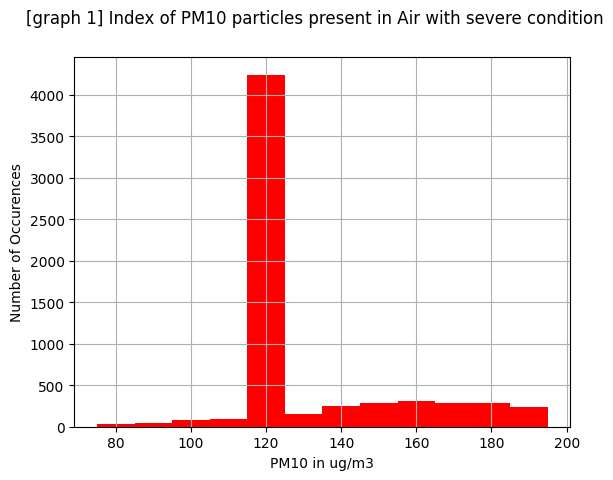

In [ ]:
severeaq = aqdf[(aqdf["AQIStatus"] == "Severe")]
hist1=severeaq['PM10']
bin_values = np.arange(start=75, stop=200, step=10)
hist1.hist(bins=bin_values,color='red')
plt.suptitle("[graph 1] Index of PM10 particles present in Air with severe condition")
plt.xlabel("PM10 in ug/m3")
plt.ylabel("Number of Occurences")

Text(0, 0.5, 'Number of Occurences')

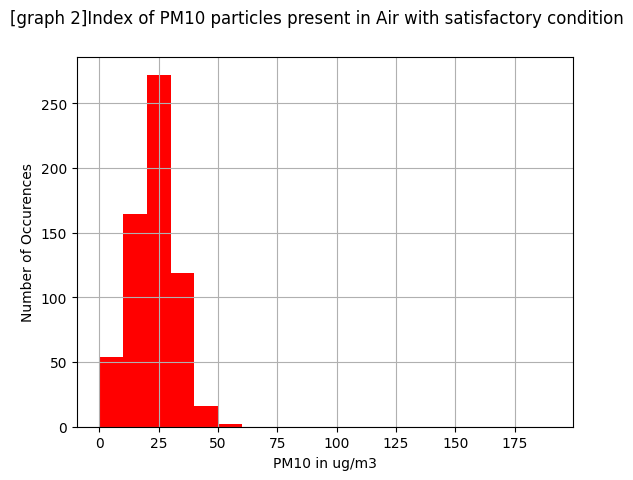

In [ ]:
goodaq = aqdf[(aqdf["AQIStatus"] == "Satisfactory")]
hist2=goodaq['PM10']
bin_values = np.arange(start=0, stop=200, step=10)
hist2.hist(bins=bin_values,color='red')
plt.suptitle("[graph 2]Index of PM10 particles present in Air with satisfactory condition")
plt.xlabel("PM10 in ug/m3")
plt.ylabel("Number of Occurences")


Text(0.5, 0, 'SO2 in ug/m3')

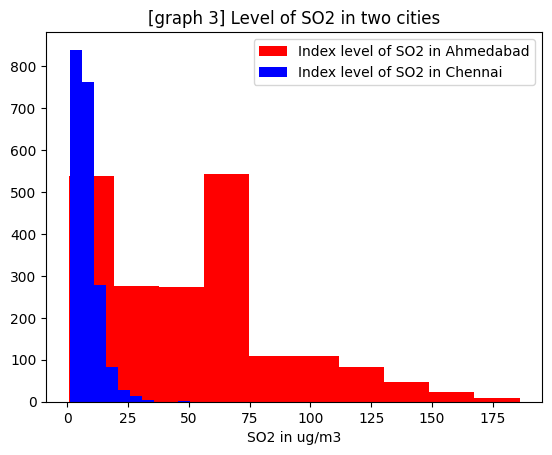

In [ ]:
Chennaiaq = aqdf[(aqdf["City"] == "Chennai")]
Ahmedabadaq = aqdf[(aqdf["City"] == "Ahmedabad")]
plt.hist(Ahmedabadaq['SO2'],color='red')
plt.hist(Chennaiaq['SO2'],color='blue')


plt.legend(['Index level of SO2 in Ahmedabad','Index level of SO2 in Chennai'])
plt.title("[graph 3] Level of SO2 in two cities")
plt.xlabel('SO2 in ug/m3')


**[graph 4]Pairplot graph**

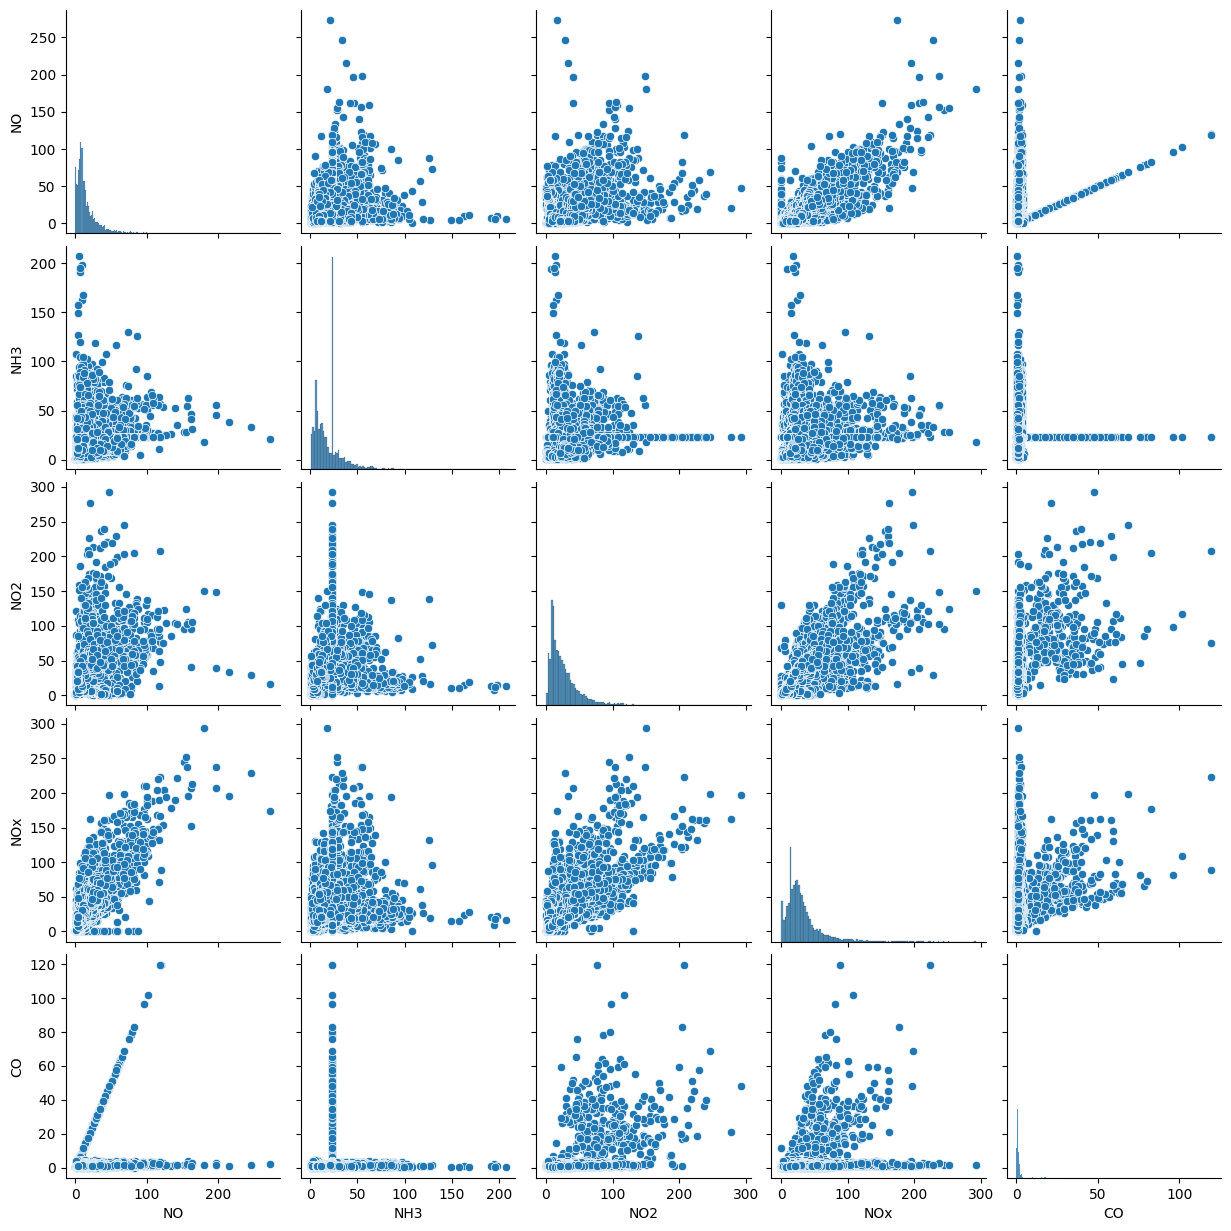

In [ ]:
Recentaq=aqdf[aqdf['Date'].str.contains('2019-')]
Dataq=Recentaq[['NO','NH3','NO2','NOx','CO']]
x=sb.pairplot(Dataq)


3) Ask & answer questions about the data (11 marks)

•	Ask at least 4 interesting questions about your dataset

•	Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn

•	Create new columns, merge multiple datasets and perform grouping/aggregation wherever necessary

•	Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does


**Which city has the most AQI and which city has the least AQI?**

To Answer this question, we must first find the average of each city and sort them from most to least. 

From the below result, we can find that **Delhi city** Average Air Quality Index is the worst in recent years, While **Aizawl City** Average Air Quality Index is the best with **118.14** AQI. Here group_by() function is used to categorize the values based on city.



**[Series 1] Mean AQI by City**

In [ ]:
AverageAQI=aqdf.groupby("City")["AQI"].mean()
AverageAQI.sort_values(ascending=[0])


City
Delhi                 625.278984
Ahmedabad             452.178629
Mumbai                450.565556
Patna                 441.489859
Gurugram              407.401642
Kolkata               396.690152
Lucknow               382.356246
Talcher               359.231304
Jaipur                355.111266
Jorapokhar            326.297545
Brajrajnagar          323.723157
Bhopal                321.814579
Guwahati              313.689533
Visakhapatnam         305.116058
Chennai               304.096301
Amritsar              299.970215
Kochi                 284.766516
Hyderabad             271.893742
Bengaluru             254.468842
Chandigarh            235.894452
Amaravati             229.159458
Shillong              213.486072
Ernakulam             189.035903
Coimbatore            188.518824
Thiruvananthapuram    153.639740
Aizawl                118.143461
Name: AQI, dtype: float64

**Which day in the last 5 years had the worst Air Quality?**
The date on which the air quality index was worst, can be elicited by finding the max value of AQI and the date pertaining to it. From the below code, we were able to find the date with worst Air Quality which is **2019-05-04**	. max() function returns the maximum value of passed column.

In [ ]:
WorstAQI=aqdf[aqdf['AQI']==aqdf['AQI'].max()]
WorstAQI

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQIStatus
14156,Guwahati,2019-05-04,916.67,1000.0,37.7,13.57,69.67,99.42,0.23,48.03,51.3,86.24,0.0,0.0,2322.83,Severe


**What is the count of Severe Air Quality days in each city?**

Categorizing the cities based on the AQIStatus will gives the Answer for this query. By Analzying the barchart we see that the City with most number of Severe Air Quality days is **Delhi**. value_counts() returns the sums of each occurences of the value.

<Axes: title={'center': '[graph 5]Severe AQI by City'}>

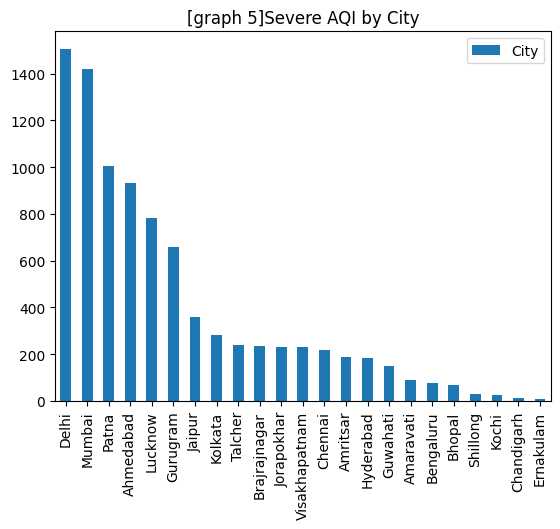

In [ ]:
SevereAQI=aqdf[(aqdf["AQIStatus"] == "Severe")]
x=SevereAQI['City'].value_counts()
y=pd.DataFrame(x)

y.plot.bar(title='[graph 5]Severe AQI by City')

**Which element is the biggest contributor to the AQI?**

The proportion in which each element affects the overall air quality index can be elicited by plotting a pie chart with average value of each element. From the below pie chart, we can find that the biggest contibutor to Overall AQI is **PM10 (Particulate Matter)**. I have made use of the pie() function from matplotlib which is an adapt graph for such visualization.



[Series 2] average value by Elements

NO          17.201890
NH3         23.483476
NO2         27.377308
NOx         32.611069
CO           2.292734
Toluene      6.331783
PM2.5       67.450578
PM10       118.127103
SO2         22.282978
O3          34.491430
Benzene      2.656135
Xylene       1.187464
dtype: float64


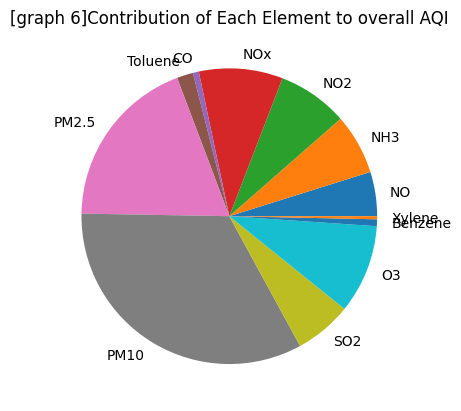

In [ ]:
Averagedf = aqdf[['NO','NH3','NO2','NOx','CO','Toluene','PM2.5','PM10','SO2','O3','Benzene','Xylene']].mean()
Averagedf.plot.pie(title='[graph 6]Contribution of Each Element to overall AQI')

print(Averagedf)

4) Summarize your inferences & write a conclusion (5 marks)

•	Write a summary of what you have learned from the analysis

•	Include interesting insights and graphs from previous sections **bold text**


**Summary**

*   The overall Average Air Quality Index(AQI) across all the cities considered over the period of 5 years (2015 - 2020) is **355.49**[Table 0]. The Status of Air Quality is **poor**. Management needs to considers this and try to improve air quality by taking necessary measures.

*   By analyzing the graphs related to particulate matter(PM10), the Index of PM10 is more in cities with Severe Air Quality Conditions with peak index range of **120**[graph 1] when compared to cities with satisfactory Air Quality with peak range of **25**[graph 2].

*   Sulphur Dioxide (SO2) in the Air of two sample cities of Chennai and Ahmedabad depicted by a above graph [graph 3] shows that SO2 in air of city chennai is significantly less with index range of **0 to 50** compared to SO2 in Air of Ahmedabad city with range of **0 to 180**.

*   From Analyzing the Pairplot graph[graph 4] from seaborn, We can see that most of the elements in the Air holds a **linear association** with one another and has a positively **skewed range of values**.

*   With Data Evidence from [graph 5] & [Series 1], the City with the worst overall Air Quality is **Delhi**. But, the Air Quality with the most severe index in a single day was recoreded in **Guwhati** on **May 4th, 2019**.

*   The Contribution of PM10 and PM2.5 elements (Dust) combined contributes to **more than 50%** in the **Overall Air Quality Index** (AQI). The Contribution of **every other element combined is less than the contibution of PM10 and PM2.5**. This inference is made from [graph 6]



